In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read in the globalsystem2 results as csv, with `dtype=np.float32` in order to aid with loading in

In [ ]:
df = pd.read_csv('../data/testglobalsystem2_res.csv', dtype=np.float32)
print(df.shape)

In [ ]:
df_new = df.drop_duplicates(subset='CHP.fluid.h')
print(df_new.shape)

In [21]:
df_new = pd.read_csv('../data/testglobalsystem2_res_dropped.csv')

In [22]:
cols_to_keep = []
for col in df_new.columns:
    if df_new[col].nunique() > 1:
        cols_to_keep.append(col)

In [ ]:
df_new.to_csv('../data/testglobalsystem2_res_dropped.csv')

In [23]:
df_new = pd.read_csv('../data/testglobalsystem2_res_dropped.csv', usecols=cols_to_keep)

In [24]:
df_new = df_new.drop(columns='Unnamed: 0')
print(df_new.shape)
print(df_new.head())

(96732, 2939)
         time  CHP.fluid.h     E_amb_TES  E_el_buy  G.CO2_air.CO2  \
0    0.000000   2092000.00  0.000000e+00       0.0      1940.0000   
1   59.471302    129782.12  3.517455e-21       0.0      1466.9448   
2   60.000000    129710.63  5.939979e-21       0.0      1464.2437   
3  240.000000    157395.55 -4.640570e-18       0.0      1023.8505   
4  300.000000    166805.78 -1.973970e-17       0.0       977.9299   

   G.CO2_top.CO2  G.E_th_tot_kWhm2  G.PID_CO2.I  G.PID_Mdot.I  \
0      1940.0000          0.000000     1.250000      0.714286   
1      1478.9320          0.003939     1.322455      0.647800   
2      1476.0664          0.003976     1.419609      0.647358   
3      1027.2251          0.016742     2.500000      0.774613   
4       979.5965          0.021026     2.500000      0.836845   

   G.Q_cd_Soil.Layer_c[1].T  ...  G.SC.T3b.condition  G.SC.T3c.condition  \
0                 288.15000  ...                 0.0                 0.0   
1                 288.17136 

drop initial hours due to abnormalities during initialisation

In [25]:
df_new = df_new.iloc[2:]

In [26]:
print(df_new.isna().sum().sort_values())
df_new = df_new.drop(columns=['HP.h_ex_ev','HP.Exhaust_ev.h_outflow'])

time                                       0
TES.Summary.T_profile.Twf[9]               0
TES.Summary.T_profile.Twf[10]              0
TES.Summary.T_profile.Twf[11]              0
TES.Summary.T_profile.Twf[12]              0
                                       ...  
TES.flow1Dim.Cells[8].InFlow.m_flow        0
TES.cell1DimInc_hx[13].qdot_hx             0
controller.T2.condition                    0
HP.h_ex_ev                             96692
HP.Exhaust_ev.h_outflow                96692
Length: 2939, dtype: int64


In [27]:
print(df_new.isna().sum().sum())

0


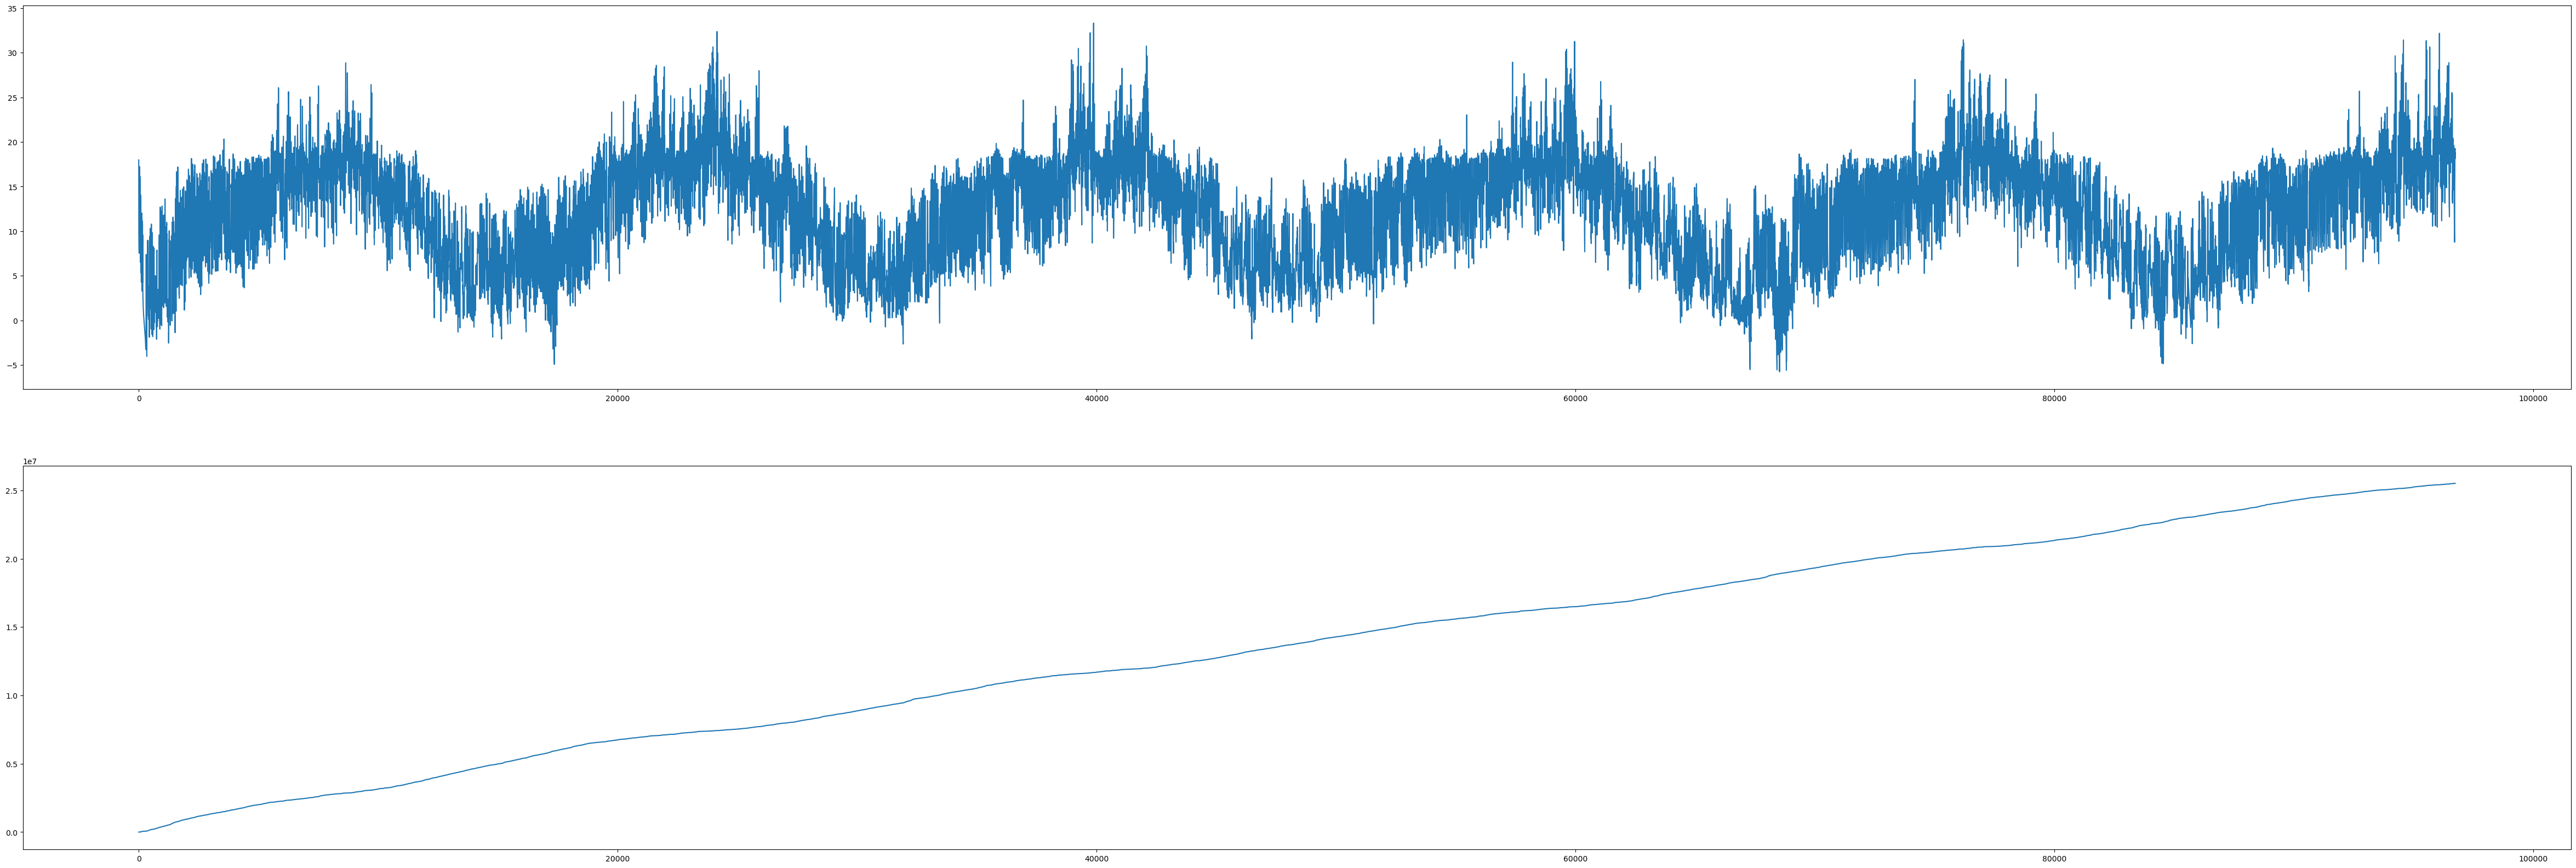

In [28]:
fig, ax = plt.subplots(2, figsize=(60,20))

ax[0].plot(df_new['G.air.T'] - 273.15)
ax[1].plot(df_new['G.E_el_tot'])

plt.show()

In [29]:
import re

#pattern = '^(?!.*TYM)(?!.*der)(?!.*SC)(?!.*\[).*$' #match columns without [, ..., in name
pattern = '^(?!.*TYM)(?!.*der)(?!.*\[).*$' #match columns without reference to derivative, tomato yield model (TYM) or [

matched_columns = [col for col in df_new.columns if re.match(pattern,col)]
print(len(matched_columns))
for col in matched_columns:
    print(col)

856
time
CHP.fluid.h
E_amb_TES
E_el_buy
G.CO2_air.CO2
G.CO2_top.CO2
G.E_th_tot_kWhm2
G.PID_CO2.I
G.PID_Mdot.I
G.U_vents.PID.I
G.U_vents.PIDT.I
G.U_vents.PIDT_noH.I
G.W_el_illu
G.air.T
G.air.airVP.VP
G.air_Top.T
G.air_Top.air.VP
G.canopy.T
G.cover.T
G.floor.T
HP.fluid.h
CHP.OutFlow.m_flow
CHP.Qdot
CHP.T_water_ex_CHP
CHP.Wdot
CHP.eta_el
CHP.eta_th
CHP.fluid.M_dot
CHP.fluid.Q_tot
CHP.fluid.T
CHP.fluid.hnode_ex
CHP.fluid.hnode_su
CHP.fluid.qdot
CHP.heatPortConverter.thermalPortL.T
C_buy
E_amb_TES_kWhm2
E_el_buy_kWhm2
E_th_G
E_th_G_kWhm2
G.CO2_SP_var.y
G.CO2_air.MC_flow
G.CO2_top.CO2_ppm
G.CO2_top.MC_flow
G.CO2out.port.MC_flow
G.E_el_tot
G.MC_AirCan.MC_AirCan
G.MC_AirOut.MC_flow
G.MC_AirOut.dC
G.MC_AirOut.f_vent
G.MC_AirTop.MC_flow
G.MC_AirTop.dC
G.MC_AirTop.f_vent
G.MC_ExtAir.MC_flow
G.MC_TopOut.MC_flow
G.MC_TopOut.dC
G.MC_TopOut.f_vent
G.MV_CanAir.C_3
G.MV_CanAir.C_4
G.MV_CanAir.C_5
G.MV_CanAir.E_Wm2
G.MV_CanAir.E_kgsm2
G.MV_CanAir.MV_flow
G.MV_CanAir.R_can
G.MV_CanAir.S_rs
G.MV_CanAir.T_

In [30]:
for column in matched_columns:
    col_type = df_new[column].dtype
    unique_values = df_new[column].nunique()
    
    if unique_values > 3:
        print(f"{column} : CONTINUOUS")
    else:
        print(f"{column} : DISCRETE")

time : CONTINUOUS
CHP.fluid.h : CONTINUOUS
E_amb_TES : CONTINUOUS
E_el_buy : CONTINUOUS
G.CO2_air.CO2 : CONTINUOUS
G.CO2_top.CO2 : CONTINUOUS
G.E_th_tot_kWhm2 : CONTINUOUS
G.PID_CO2.I : CONTINUOUS
G.PID_Mdot.I : CONTINUOUS
G.U_vents.PID.I : CONTINUOUS
G.U_vents.PIDT.I : CONTINUOUS
G.U_vents.PIDT_noH.I : CONTINUOUS
G.W_el_illu : CONTINUOUS
G.air.T : CONTINUOUS
G.air.airVP.VP : CONTINUOUS
G.air_Top.T : CONTINUOUS
G.air_Top.air.VP : CONTINUOUS
G.canopy.T : CONTINUOUS
G.cover.T : CONTINUOUS
G.floor.T : CONTINUOUS
HP.fluid.h : CONTINUOUS
CHP.OutFlow.m_flow : DISCRETE
CHP.Qdot : CONTINUOUS
CHP.T_water_ex_CHP : CONTINUOUS
CHP.Wdot : CONTINUOUS
CHP.eta_el : CONTINUOUS
CHP.eta_th : CONTINUOUS
CHP.fluid.M_dot : DISCRETE
CHP.fluid.Q_tot : DISCRETE
CHP.fluid.T : CONTINUOUS
CHP.fluid.hnode_ex : CONTINUOUS
CHP.fluid.hnode_su : CONTINUOUS
CHP.fluid.qdot : DISCRETE
CHP.heatPortConverter.thermalPortL.T : CONTINUOUS
C_buy : CONTINUOUS
E_amb_TES_kWhm2 : CONTINUOUS
E_el_buy_kWhm2 : CONTINUOUS
E_th_G : CON

G.SC.SC_OWD_value.SC_value.o2.y : DISCRETE
G.SC.SC_OWD_value.SC_value.o3.y : DISCRETE
G.SC.SC_OWD_value.SC_value.o4.y : DISCRETE
G.SC.SC_OWD_value.SC_value.o5.y : DISCRETE
G.SC.SC_OWD_value.SC_value.o6.y : DISCRETE
G.SC.SC_OWD_value.SC_value.o7.y : DISCRETE
G.SC.SC_OWD_value.SC_value.o8.y : DISCRETE
G.SC.SC_OWD_value.SC_value.o9.y : DISCRETE
G.SC.SC_OWD_value.SC_value.open_coldDays.y : CONTINUOUS
G.SC.SC_OWD_value.SC_value.y : CONTINUOUS
G.T_ex_1ry.T : CONTINUOUS
G.T_ex_2ry.T : CONTINUOUS
G.T_su_1ry.T : CONTINUOUS
G.Tout_Kelvin.y : CONTINUOUS
G.U_vents.PID.CS : CONTINUOUS
G.U_vents.PID.CSbs : CONTINUOUS
G.U_vents.PID.CSs : CONTINUOUS
G.U_vents.PID.P : CONTINUOUS
G.U_vents.PID.PVs : CONTINUOUS
G.U_vents.PID.track : CONTINUOUS
G.U_vents.PIDT.CS : CONTINUOUS
G.U_vents.PIDT.CSbs : CONTINUOUS
G.U_vents.PIDT.CSs : CONTINUOUS
G.U_vents.PIDT.P : CONTINUOUS
G.U_vents.PIDT.PVs : CONTINUOUS
G.U_vents.PIDT.track : CONTINUOUS
G.U_vents.PIDT_noH.CS : CONTINUOUS
G.U_vents.PIDT_noH.CSbs : CONTINUOUS
G

G.Q_cnv_TopCov.HeatPort_b.T : CONTINUOUS
G.Q_cnv_TopCov.MassPort_a.VP : CONTINUOUS
G.Q_cnv_TopCov.MassPort_b.VP : CONTINUOUS
G.Q_cnv_UpAir.port_b.Q_flow : CONTINUOUS
G.Q_cnv_UpAir.port_b.T : CONTINUOUS
G.Q_rad_CanCov.FFa : CONTINUOUS
G.Q_rad_CanCov.port_a.Q_flow : CONTINUOUS
G.Q_rad_CanCov.port_a.T : CONTINUOUS
G.Q_rad_CanCov.port_b.Q_flow : CONTINUOUS
G.Q_rad_CanCov.port_b.T : CONTINUOUS
G.Q_rad_CanScr.FFa : CONTINUOUS
G.Q_rad_CanScr.port_a.T : CONTINUOUS
G.Q_rad_CovSky.port_a.Q_flow : CONTINUOUS
G.Q_rad_CovSky.port_a.T : CONTINUOUS
G.Q_rad_CovSky.port_b.Q_flow : CONTINUOUS
G.Q_rad_CovSky.port_b.T : CONTINUOUS
G.Q_rad_FlrCan.FFb : CONTINUOUS
G.Q_rad_FlrCan.port_a.Q_flow : CONTINUOUS
G.Q_rad_FlrCan.port_a.T : CONTINUOUS
G.Q_rad_FlrCan.port_b.Q_flow : CONTINUOUS
G.Q_rad_FlrCan.port_b.T : CONTINUOUS
G.Q_rad_FlrCov.FFab2 : CONTINUOUS
G.Q_rad_FlrCov.port_a.Q_flow : CONTINUOUS
G.Q_rad_FlrCov.port_a.T : CONTINUOUS
G.Q_rad_FlrCov.port_b.Q_flow : CONTINUOUS
G.Q_rad_FlrCov.port_b.T : CONTINUOUS

pdrop_1ry.InFlow.p : CONTINUOUS
pdrop_1ry.OutFlow.h_outflow : CONTINUOUS
pdrop_1ry.OutFlow.m_flow : CONTINUOUS
pdrop_2ry.InFlow.m_flow : DISCRETE
pdrop_2ry.InFlow.p : DISCRETE
pdrop_2ry.OutFlow.h_outflow : CONTINUOUS
pdrop_2ry.OutFlow.m_flow : DISCRETE
pump_1ry.Mdot : CONTINUOUS
pump_1ry.flow_in : CONTINUOUS
pump_1ry.inlet.h_outflow : CONTINUOUS
pump_1ry.inlet.m_flow : CONTINUOUS
pump_1ry.outlet.h_outflow : CONTINUOUS
pump_1ry.outlet.m_flow : CONTINUOUS
pump_1ry.outlet.p : CONTINUOUS
pump_2ry.Mdot : DISCRETE
pump_2ry.flow_in : DISCRETE
pump_2ry.inlet.h_outflow : CONTINUOUS
pump_2ry.inlet.m_flow : DISCRETE
pump_2ry.outlet.m_flow : DISCRETE
pump_2ry.outlet.p : DISCRETE
set_Mdot_2ry.y : DISCRETE
set_Mdot_air.y : DISCRETE
sinkP_air.flangeB.m_flow : DISCRETE
sourceMdot.flangeB.h_outflow : CONTINUOUS
sourceMdot.flangeB.m_flow : DISCRETE
sourceMdot.h : CONTINUOUS
sourceMdot.in_Mdot : DISCRETE
sourceMdot.in_T : CONTINUOUS
G.SC.T2.condition : DISCRETE
G.SC.T2b.condition : DISCRETE
G.SC.T2c.cond

In [31]:
df_new = pd.read_csv('../data/testglobalsystem2_res_dropped.csv', usecols=matched_columns, index_col='time')
print(df_new)

              CHP.fluid.h     E_amb_TES    E_el_buy  G.CO2_air.CO2  \
time                                                                 
0.000000e+00  2092000.000  0.000000e+00         0.0     1940.00000   
5.947130e+01   129782.120  3.517455e-21         0.0     1466.94480   
6.000000e+01   129710.630  5.939979e-21         0.0     1464.24370   
2.400000e+02   157395.550 -4.640570e-18         0.0     1023.85050   
3.000000e+02   166805.780 -1.973970e-17         0.0      977.92990   
...                   ...           ...         ...            ...   
1.787256e+08    55827.020 -4.128620e-13  25507984.0      854.27936   
1.787292e+08    55814.066 -4.128620e-13  25507984.0      826.76086   
1.787328e+08    55802.344 -4.128620e-13  25507984.0      831.73883   
1.787345e+08    55797.080 -4.128620e-13  25508148.0      822.00867   
1.787364e+08    55791.740 -4.128620e-13  25508684.0      811.54580   

              G.CO2_top.CO2  G.E_th_tot_kWhm2  G.PID_CO2.I  G.PID_Mdot.I  \
time         

Since energy, both electrical and thermal, are calculated as cumulative totals, we can differentiate in order to get instantaneous energy consumption values

In [32]:
df_new['G.E_el_I'] = df_new['G.E_el_tot'].diff()
df_new['G.E_th_I'] = df_new['G.E_th_tot'].diff()

df_new['G.E_el_I'].fillna(df_new['G.E_el_tot'].iloc[0], inplace=True)
df_new['G.E_th_I'].fillna(df_new['G.E_th_tot'].iloc[0], inplace=True)

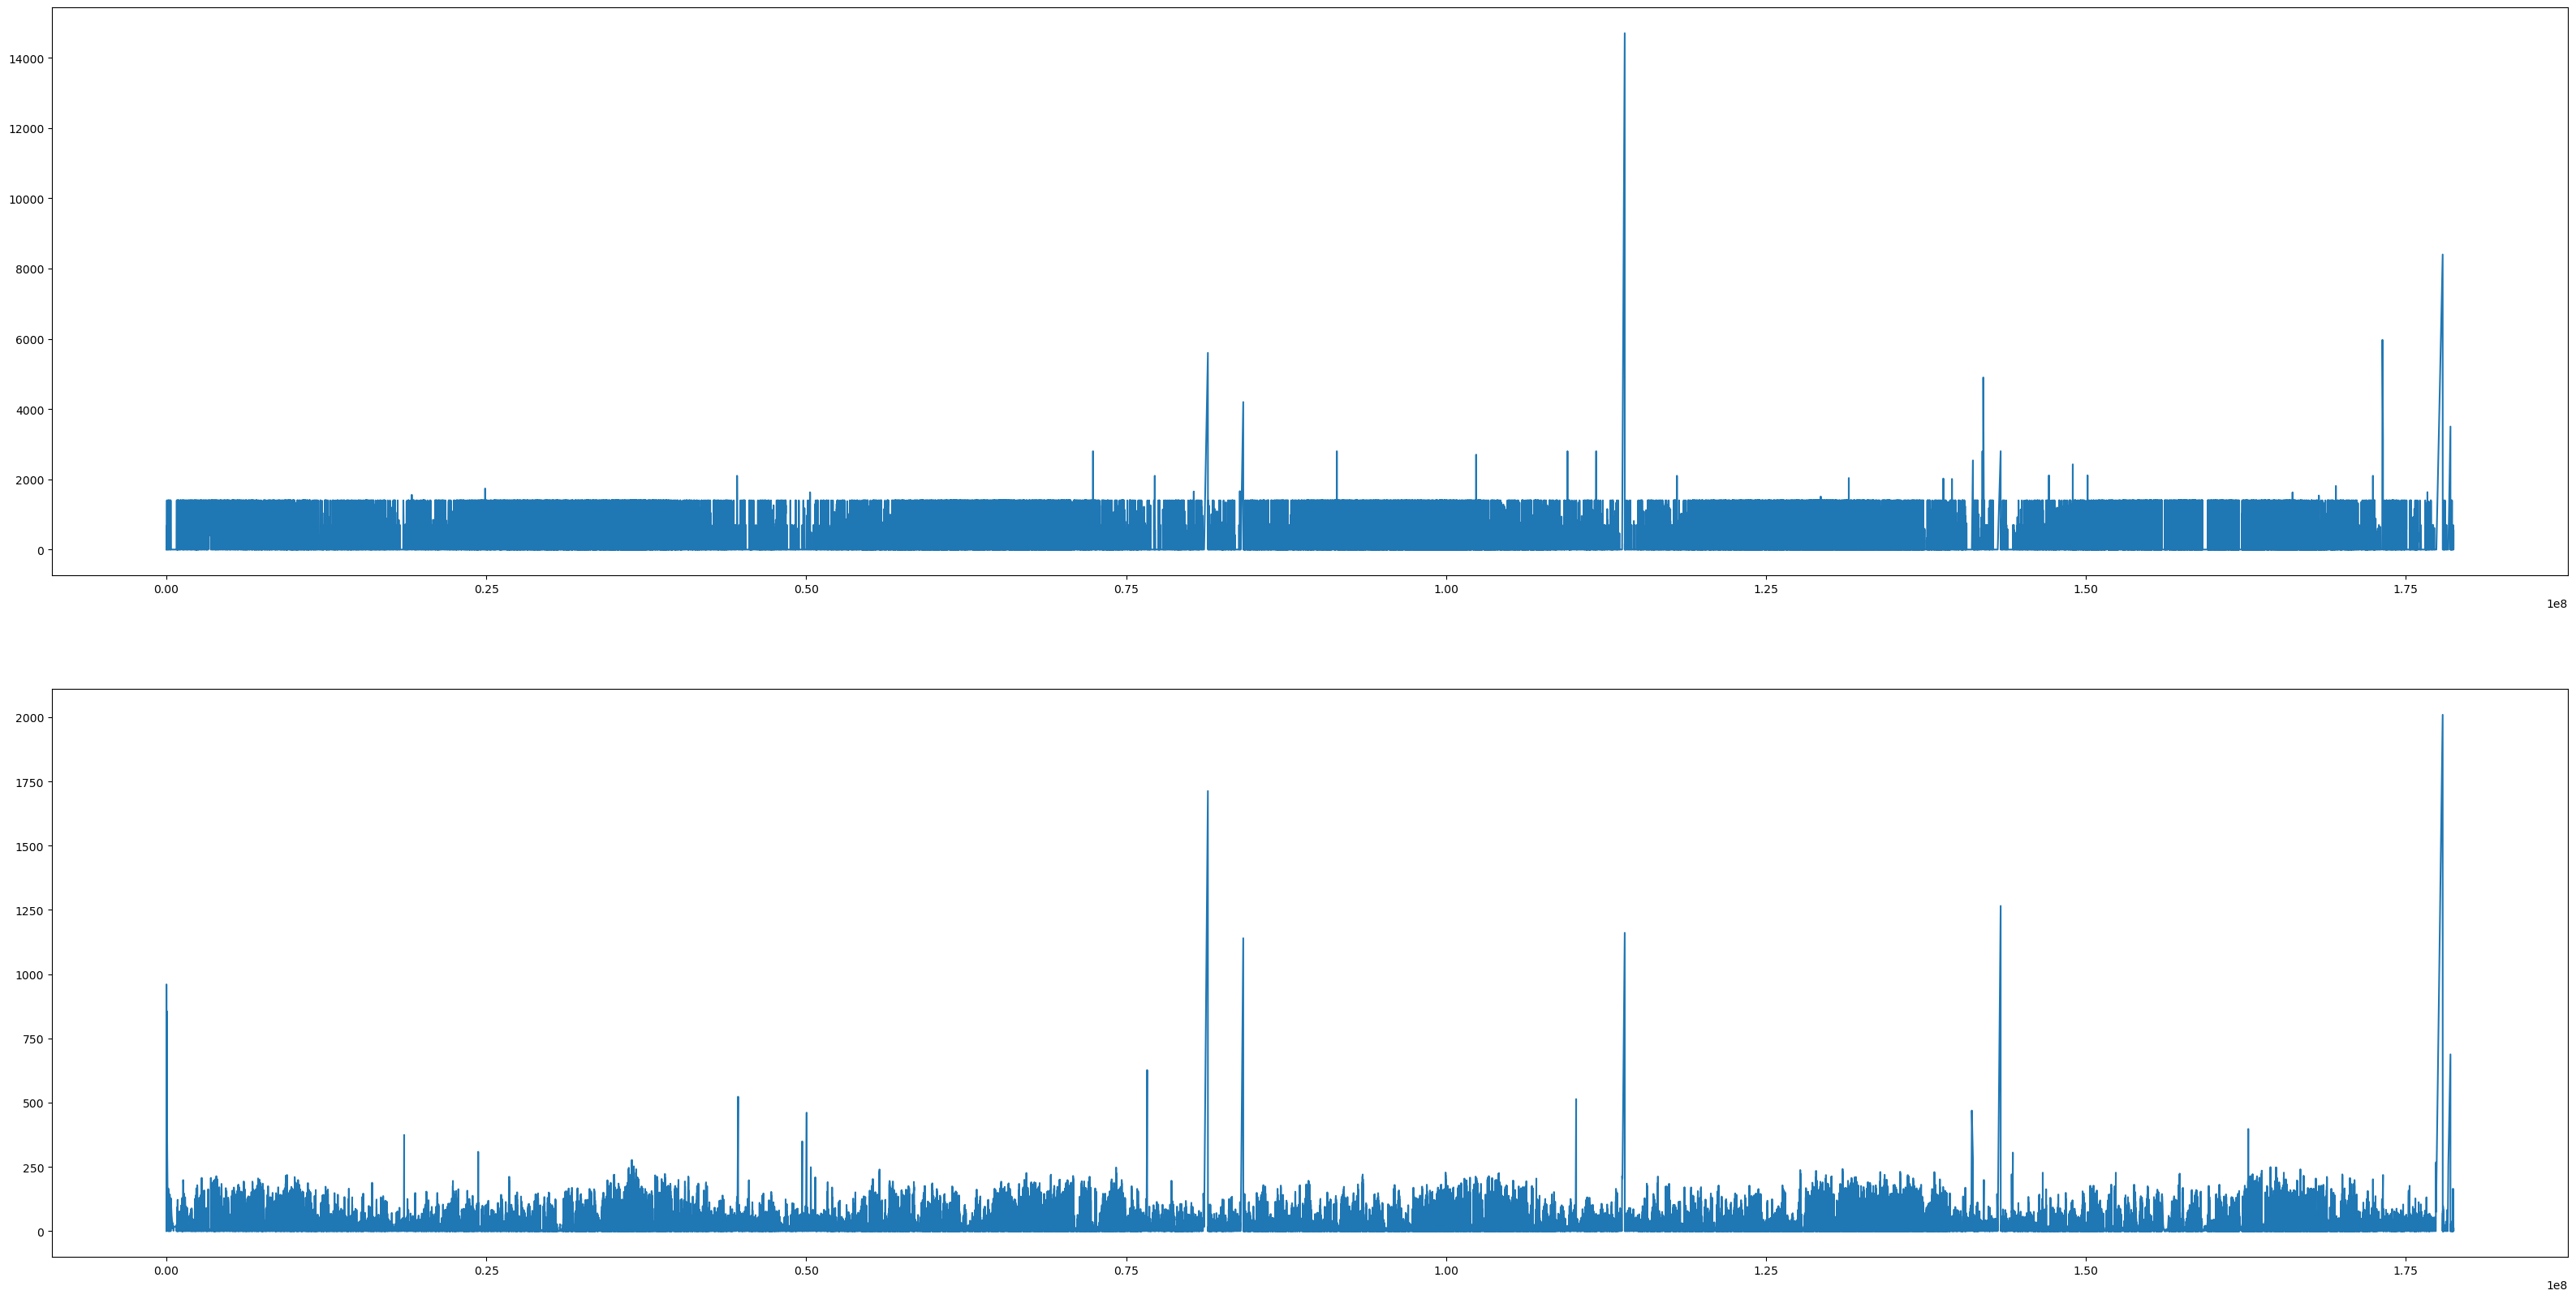

In [79]:
fig, ax = plt.subplots(2, figsize=(40,20))
ax[0].plot(df_new['G.E_el_I'])
ax[1].plot(df_new['G.E_th_I'])

#ax[0].set_xlim(0, 1_000)
#ax[1].set_xlim(0, 1_000)

plt.show()

1400.0 242.52485000006823


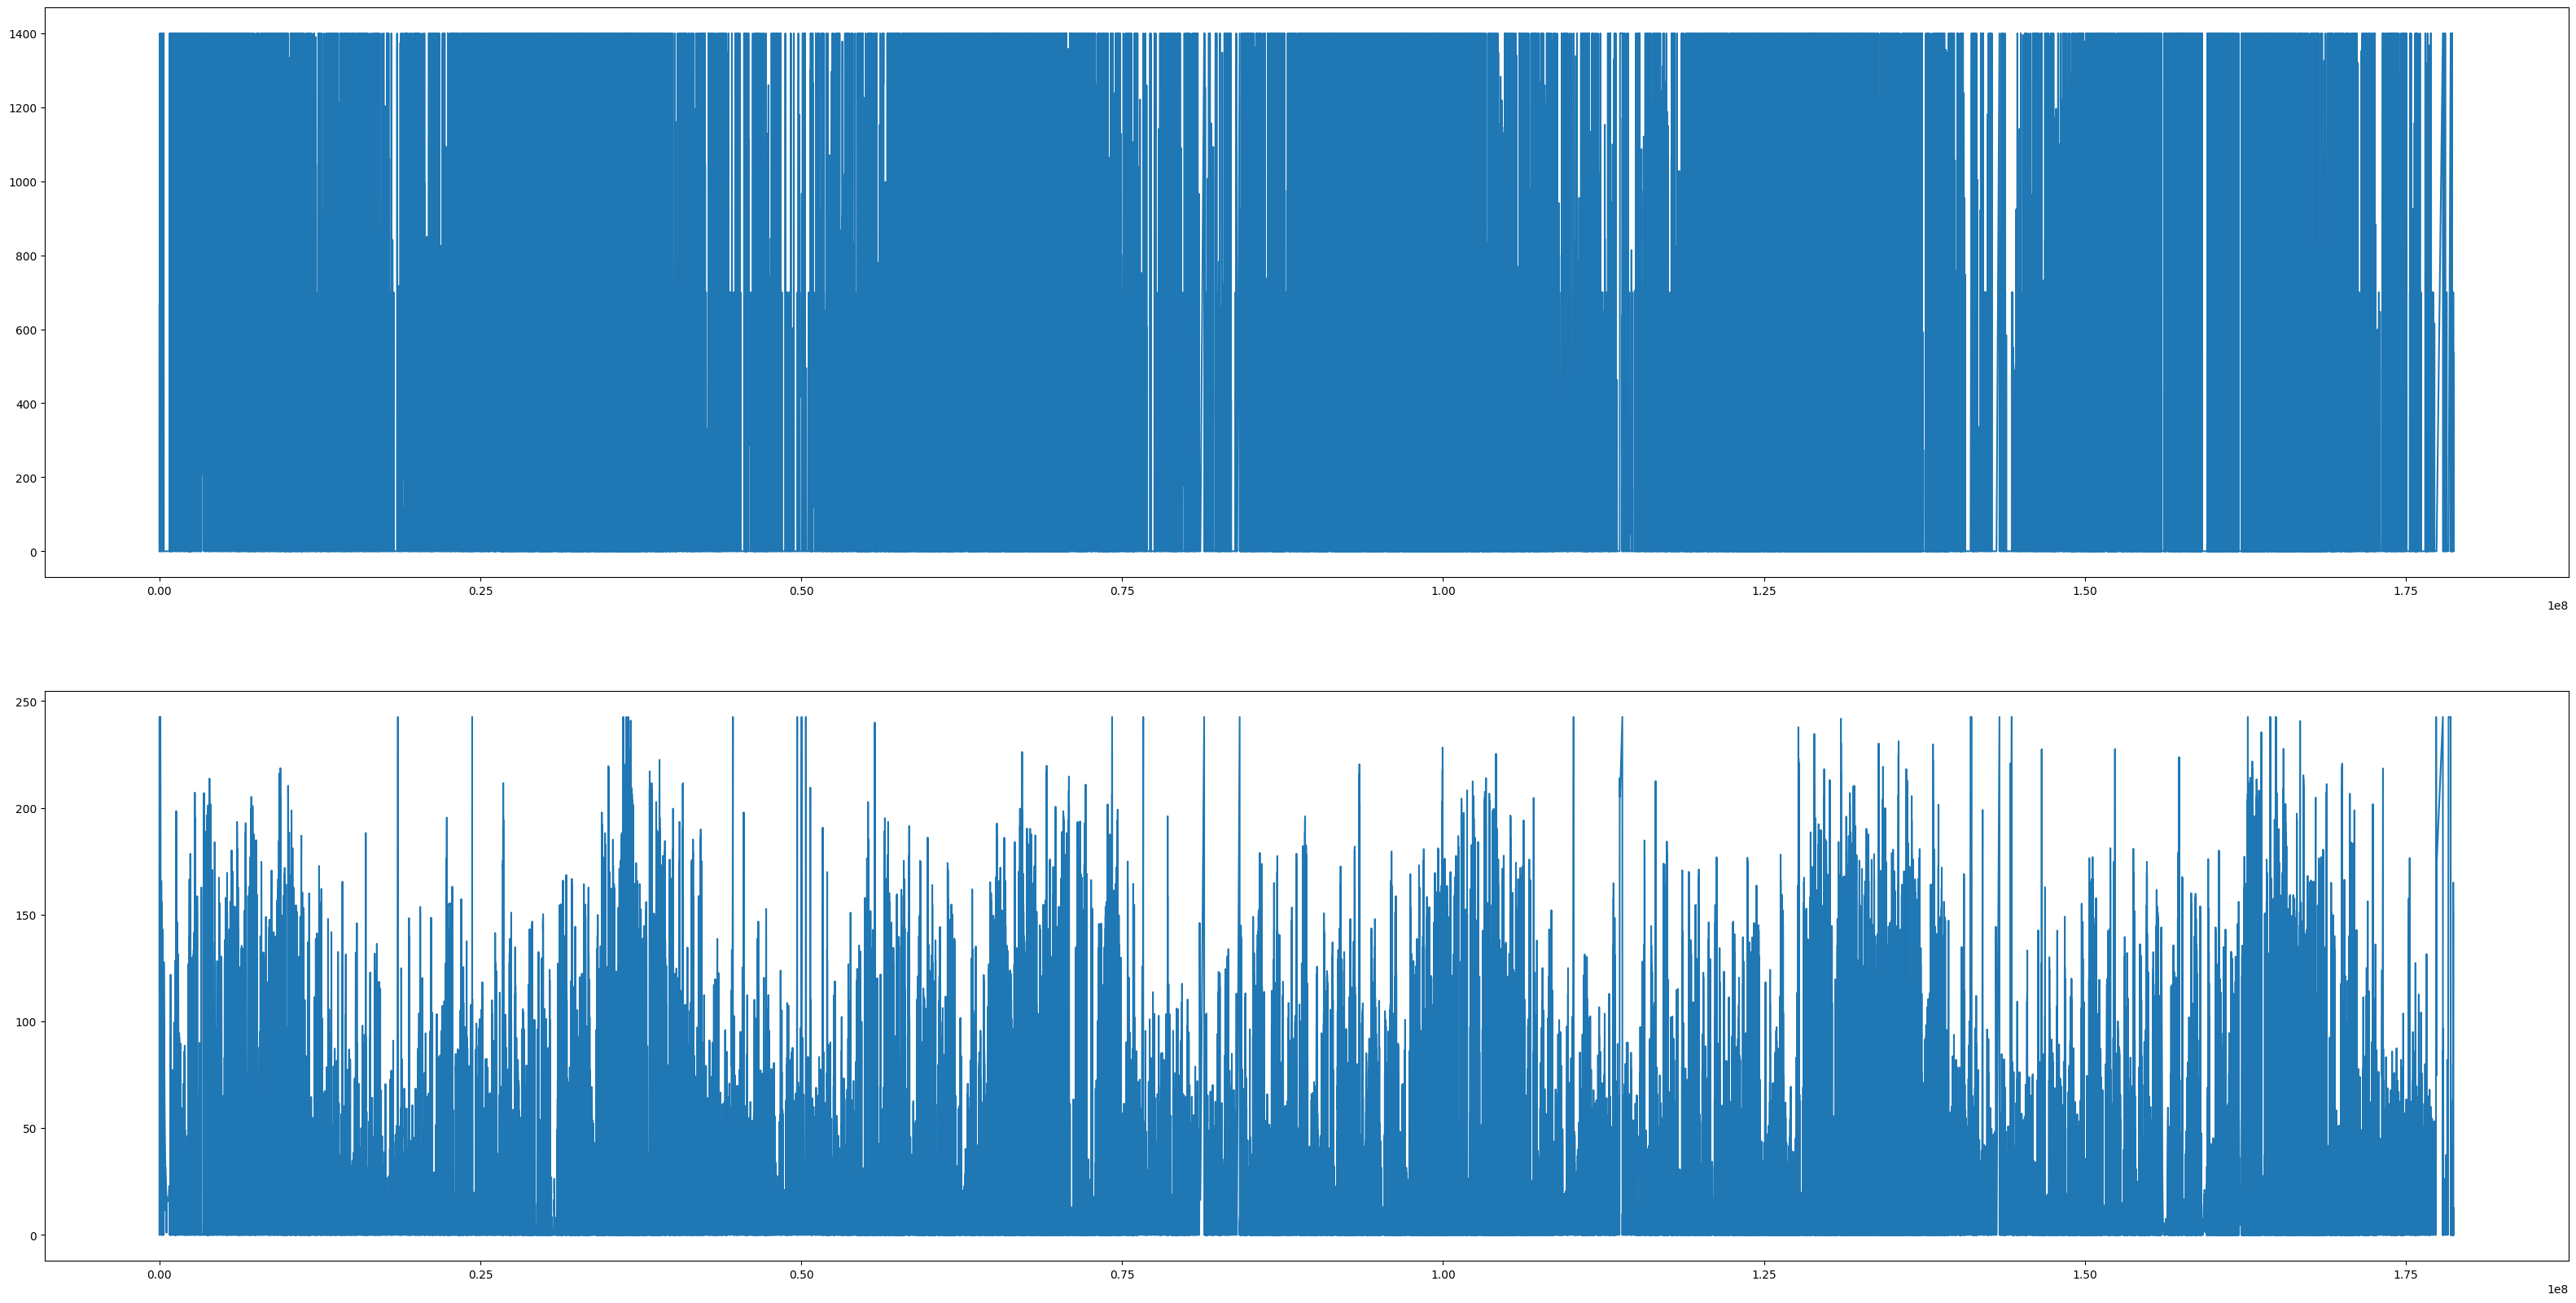

In [7]:
el_thrsh, th_thrsh = df_new['G.E_el_I'].quantile(0.99), df_new['G.E_th_I'].quantile(0.9995)

df_new['G.E_el_I'] = df_new['G.E_el_I'].apply(lambda x: min(x, el_thrsh))
df_new['G.E_th_I'] = df_new['G.E_th_I'].apply(lambda x: min(x, th_thrsh))
print(el_thrsh, th_thrsh)

fig, ax = plt.subplots(2, figsize=(40,20))
ax[0].plot(df_new['G.E_el_I'])
ax[1].plot(df_new['G.E_th_I'])

#ax[0].set_xlim(0, 1_000)
#ax[1].set_xlim(0, 1_000)

plt.show()

In [8]:
df_new.to_csv('../data/testglobalsystem2_res_reduced.csv')

In [12]:
df_new = pd.read_csv('../data/testglobalsystem2_res_reduced.csv', index_col='time')

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_new), columns=df_new.columns, index=df_new.index)

In [95]:
print(df_std)

              CHP.fluid.h  E_amb_TES  E_el_buy  G.CO2_air.CO2  G.CO2_top.CO2  \
time                                                                           
0.000000e+00     1.000000   0.778743  0.000000       1.000000       1.000000   
5.947130e+01     0.065901   0.778743  0.000000       0.614634       0.625397   
6.000000e+01     0.065867   0.778743  0.000000       0.612433       0.623069   
2.400000e+02     0.079046   0.778736  0.000000       0.253675       0.258400   
3.000000e+02     0.083526   0.778714  0.000000       0.216266       0.219703   
...                   ...        ...       ...            ...            ...   
1.787256e+08     0.030695   0.176859  0.999973       0.115536       0.116624   
1.787292e+08     0.030689   0.176859  0.999973       0.093119       0.094299   
1.787328e+08     0.030683   0.176859  0.999973       0.097174       0.098391   
1.787345e+08     0.030681   0.176859  0.999979       0.089248       0.089791   
1.787364e+08     0.030678   0.176859  1.

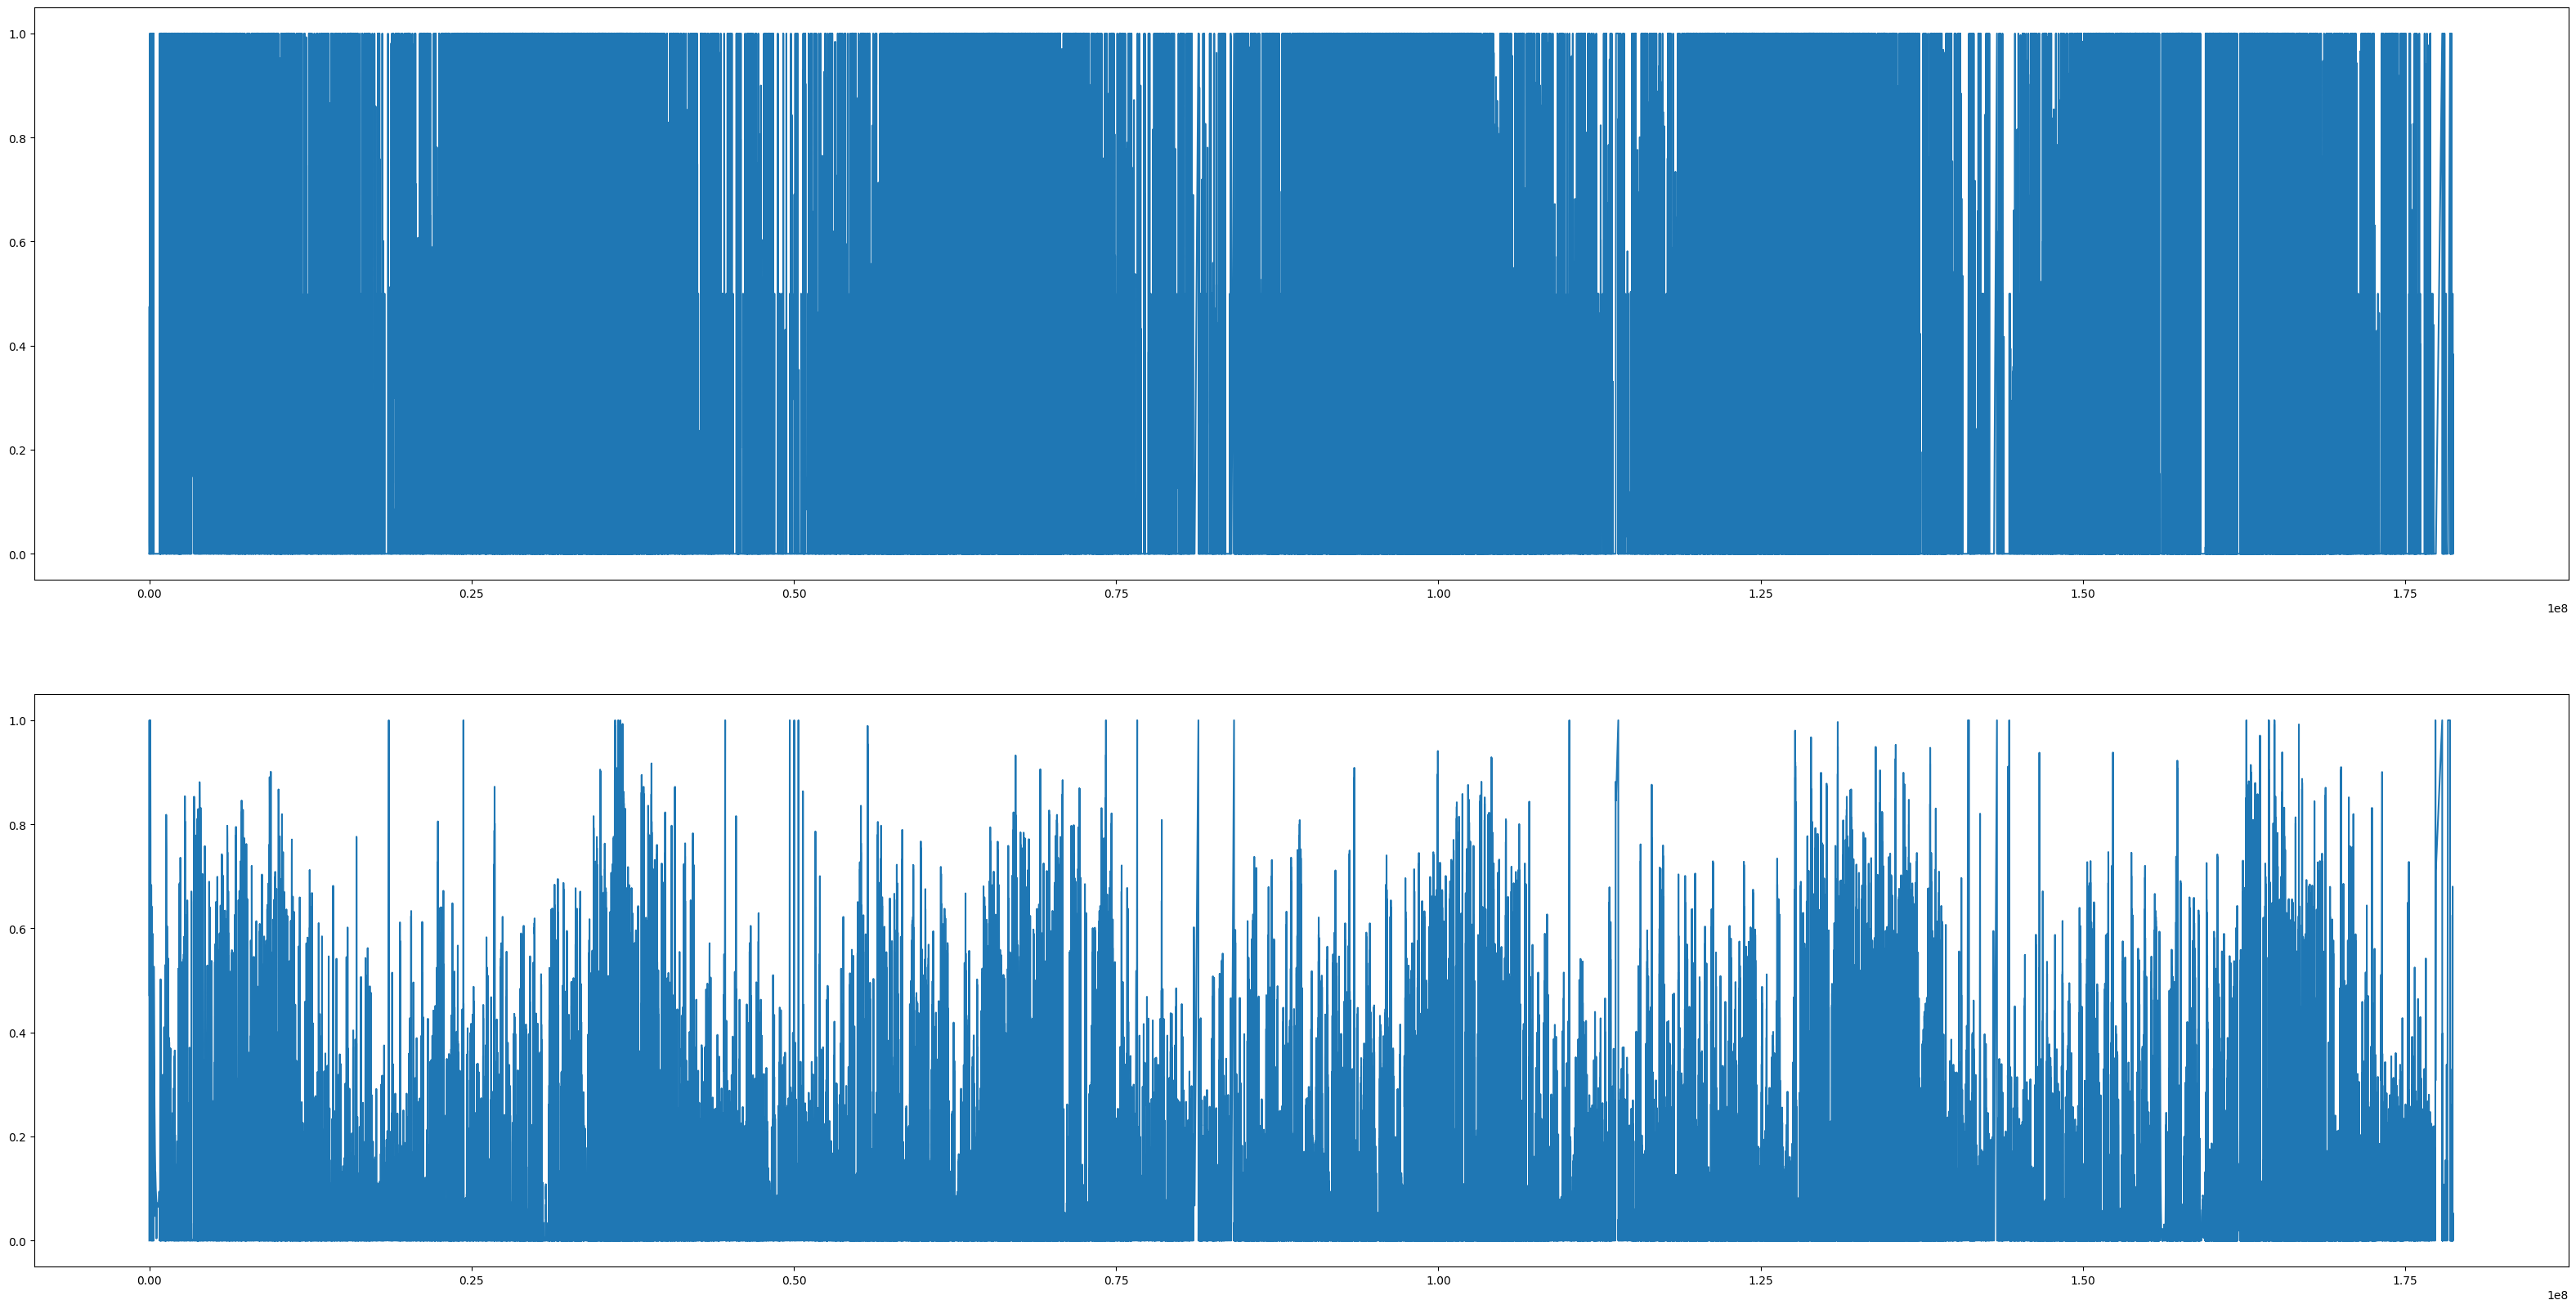

In [13]:
fig, ax = plt.subplots(2, figsize=(40,20))
ax[0].plot(df_std['G.E_el_I'])
ax[1].plot(df_std['G.E_th_I'])

#ax[0].set_xlim(0, 1_000)
#ax[1].set_xlim(0, 1_000)

plt.show()

In [11]:
df_std.to_csv('../data/testglobalsystem2_res_std.csv')

<h1> PCA </h1>

In [97]:
pca = PCA(n_components='mle')
reduced_data = pca.fit_transform(df_std)

In [98]:
print(reduced_data.shape)

(96732, 142)


In [99]:
pd.DataFrame(reduced_data).corr().round(2).abs()

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h1> PCA </h1>

In [14]:
nums = np.arange(20)
variance_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    #pca.fit(df_new)
    pca.fit(df_std)
    variance_ratio.append(np.sum(pca.explained_variance_ratio_))
    if np.sum(pca.explained_variance_ratio_) > 0.95:
        print(f'{num}')

13
14
15
16
17
18
19


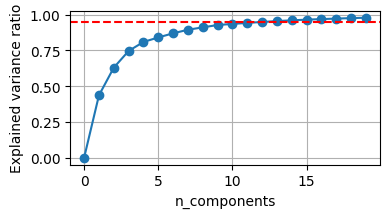

In [15]:
plt.figure(figsize=(4,2))
plt.grid()
plt.plot(nums, variance_ratio, marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')

plt.axhline(y=0.95,color='red',linestyle='--')

plt.show()

In [16]:
n = 13 #15
pca = PCA(n_components=n)
#principal_components = pca.fit_transform(df_new)
principal_components = pca.fit_transform(df_std)

pca_df = pd.DataFrame(data=principal_components, columns = [f'PC{i+1}' for i in range(n)])

In [17]:
print(pca_df)

            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      5.582888 -0.627406 -2.980144 -1.651766 -2.583067  2.846733  0.111667   
1      4.490563 -1.019536 -2.038539 -1.956559 -1.331946  2.406280 -0.332283   
2      4.247992 -1.051443 -1.937201 -1.830554 -1.430232  2.433148 -0.330383   
3     -1.338058 -2.801140  0.277203 -0.247645 -1.157539  2.363662  0.852044   
4     -1.412589 -2.906969  0.272238 -0.294055 -0.945973  2.287849  0.910686   
...         ...       ...       ...       ...       ...       ...       ...   
96727  6.836742 -1.546201  0.504392  1.235327  1.329484 -2.061496  1.342186   
96728  6.726018 -1.634940  0.550422  0.837549  1.254838 -2.041560  1.505863   
96729  6.544557 -1.728130  0.475368  0.468330  1.177103 -2.027811  1.446383   
96730  6.412642 -0.224286  1.365077 -0.263721  0.943937 -1.985485  1.610795   
96731  6.014890  1.443996  2.235583 -1.772900  0.494811 -1.908882  2.035634   

            PC8       PC9      PC10      PC11      

In [20]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n)], index=df_new.columns)
print(loadings.loc[['G.E_el_tot', 'G.E_th_tot', 'G.E_el_I', 'G.E_th_I']])

                 PC1       PC2       PC3       PC4       PC5       PC6  \
G.E_el_tot  0.001442 -0.000778 -0.004759  0.009793 -0.092085 -0.280056   
G.E_th_tot  0.001633 -0.000961 -0.004399  0.009758 -0.092185 -0.277103   
G.E_el_I   -0.007240  0.067987  0.049425 -0.039763  0.003681  0.015425   
G.E_th_I   -0.009439 -0.019282 -0.014432 -0.020703  0.010473  0.003605   

                 PC7       PC8       PC9      PC10      PC11      PC12  \
G.E_el_tot  0.003831 -0.000197 -0.005110 -0.002623  0.000013  0.000794   
G.E_th_tot  0.003890 -0.000142 -0.005381 -0.002815  0.000421  0.000827   
G.E_el_I    0.000720 -0.013843 -0.014298  0.029613  0.010473 -0.017014   
G.E_th_I    0.017185 -0.010186  0.009459 -0.006404  0.034520  0.025588   

                PC13  
G.E_el_tot  0.001650  
G.E_th_tot  0.001238  
G.E_el_I    0.072669  
G.E_th_I    0.060708  


Loading of `PC6` on `G.E_el_tot` and `G.E_th_tot` appear to be somewhat negatively correlated

In [25]:
specific_pc_loadings = loadings['PC6']
count = 0
for var, val in specific_pc_loadings.sort_values(ascending=False).items():
    if abs(val) > 0.02:
        print(f"{var}: {abs(val)}")
        count += 1
        
        
print(count)

E_amb_TES: 0.1994423754146837
G.SC.T5.localCondition: 0.060387038198385985
G.SC.T5.condition: 0.060387038198385985
G.SC.T9.localCondition: 0.05127323579784936
G.SC.T9.condition: 0.05127323579784936
G.Q_cd_Soil.TC_cc.port_b.T: 0.024095134892609574
G.Q_cd_Soil.TC_cc.port_a.T: 0.023713082356190057
G.Q_rad_FlrScr.dT: 0.023043508166769915
G.floor.T: 0.023043507576165318
G.Q_rad_UpFlr.port_b.T: 0.023043507576165318
G.Q_rad_FlrCov.port_a.T: 0.023043507576165318
G.Q_rad_FlrScr.port_a.T: 0.023043507576165318
G.Q_rad_LowFlr.port_b.T: 0.023043507576165318
G.floor.heatPort.T: 0.023043507576165318
G.Q_rad_FlrCan.port_a.T: 0.023043507576165318
G.Q_cnv_FlrAir.port_a.T: 0.023043507576165318
G.Q_cd_Soil.port_a.T: 0.023043507576165318
G.SC.T8b.condition: 0.026591526169104797
G.SC.T8b.localCondition: 0.026591526169104797
G.SC.T8.condition: 0.026591526169104797
G.SC.T4.localCondition: 0.07086451683922719
G.SC.T4.condition: 0.07086451683922719
G.E_th_tot: 0.2771030624675432
E_th_G: 0.2771030624675432
E_th_

In [ ]:
print(loadings.loc[['G.sky.T', 'G.air.T', 'G.air_Top.T', 'G.cover.T', 'G.canopy.T']])

In [ ]:
df_new_reduced = df_new.loc[:,['time','G.E_el_I', 'G.E_th_I', 'G.sky.T', 'G.air.T', 'G.air_Top.T', 'G.cover.T', 'G.canopy.T']]

In [ ]:
df_standardised_reduced = scaler.fit_transform(df_new_reduced)

In [ ]:
nums = np.arange(7)
variance_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    #pca.fit(df_new)
    pca.fit(df_standardised_reduced)
    variance_ratio.append(np.sum(pca.explained_variance_ratio_))
    if np.sum(pca.explained_variance_ratio_) > 0.95:
        print(f'{num}')
        
plt.figure(figsize=(4,2))
plt.grid()
plt.plot(nums, variance_ratio, marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')

plt.axhline(y=0.95,color='red',linestyle='--')

plt.show()

In [ ]:
n = 3
pca = PCA(n_components=n)
#principal_components = pca.fit_transform(df_new)
principal_components = pca.fit_transform(df_standardised_reduced)

pca_df = pd.DataFrame(data=principal_components, columns = [f'PC{i+1}' for i in range(n)])
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n)], index=df_new_reduced.columns)
print(loadings.loc[['G.E_el_I', 'G.E_th_I']])

In [ ]:
print(loadings.loc[['G.sky.T', 'G.air.T', 'G.air_Top.T', 'G.cover.T', 'G.canopy.T']])

In [ ]:
#pd.DataFrame(data=df_standardised_reduced, columns=df_new_reduced.columns).to_csv('test_out.csv')
#df_standardised_reduced

In [ ]:
import pandas as pd
df_new_reduced = pd.read_csv('../data/standardised_output.csv').set_index('time')

C:\Users\matth\AppData\Local\Temp\ipykernel_6360\2436186493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['G.E_tot_I'] = (data['G.E_el_I'] + data['G.E_th_I'])


Text(0.5, 1.0, 'Correlation Matrix between key variables')

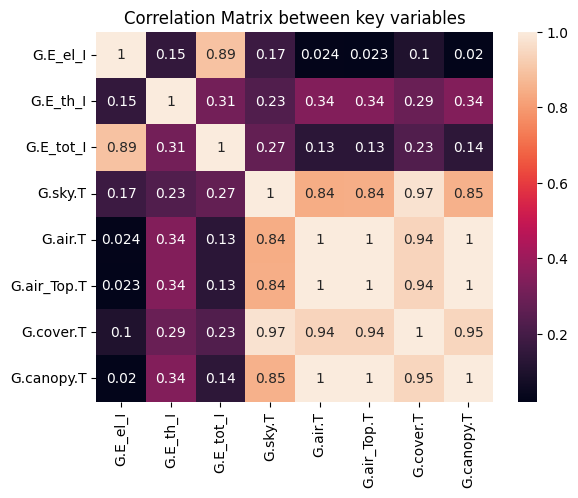

In [63]:
import seaborn as sns
columns = ['G.E_el_I', 'G.E_th_I', 'G.E_tot_I', 'G.sky.T', 'G.air.T', 'G.air_Top.T', 'G.cover.T', 'G.canopy.T']
data = df_std[['G.E_el_I', 'G.E_th_I', 'G.sky.T', 'G.air.T', 'G.air_Top.T', 'G.cover.T', 'G.canopy.T']]
data['G.E_tot_I'] = (data['G.E_el_I'] + data['G.E_th_I'])

data = data[columns]

correlation_matrix = abs(data.corr())
sns.heatmap(correlation_matrix, annot=True)
#plt.show()
plt.title('Correlation Matrix between key variables')
#plt.savefig('../imgs/corr.png')

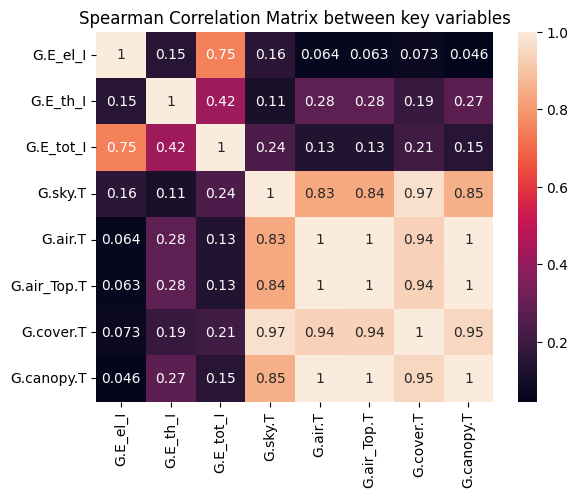

In [61]:
spearman_corr_matrix = abs(data.corr(method='spearman'))

sns.heatmap(spearman_corr_matrix, annot=True)
plt.title('Spearman Correlation Matrix between key variables')
plt.show()

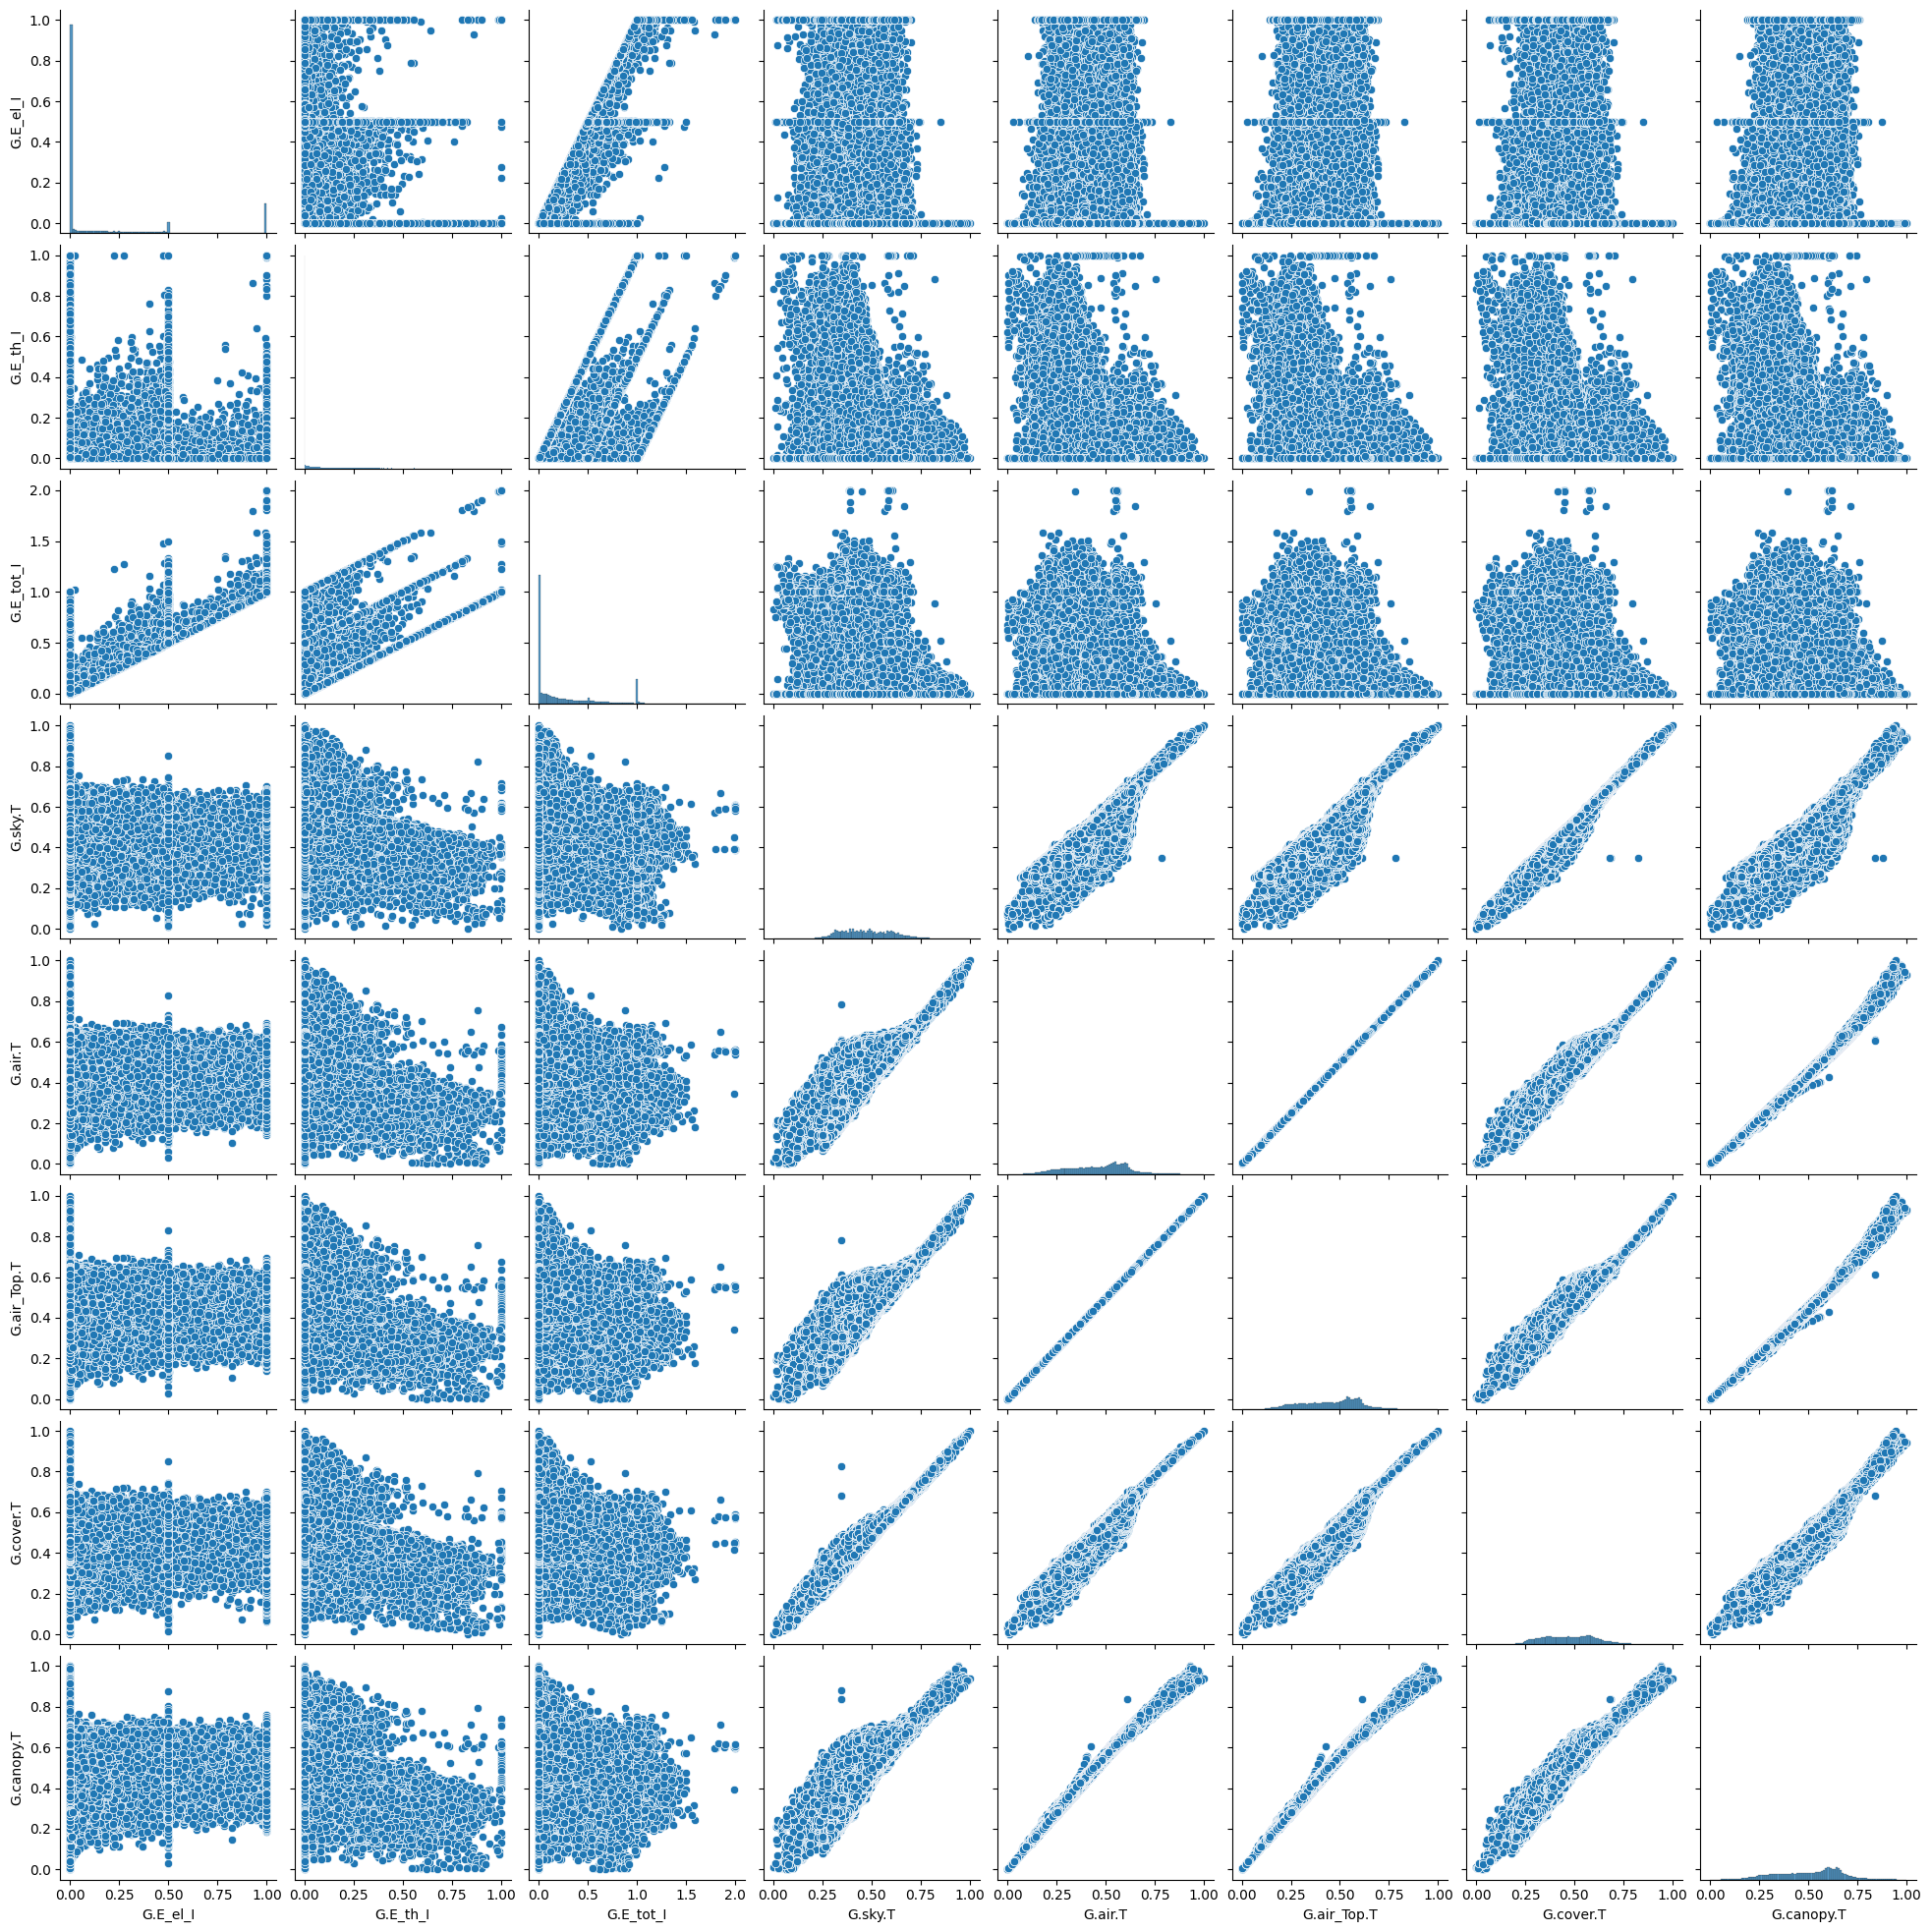

In [59]:
sns.pairplot(data)
plt.show()

In [97]:
data_lag_el, data_lag_th, data_lag_tot = data.copy(), data.copy(), data.copy()

for i in range(28):
    data_lag_el[f'G.E_el_I_lag{i+1}']   = data['G.E_el_I'].shift((i+1)*6)
    data_lag_th[f'G.E_th_I_lag{i+1}']   = data['G.E_th_I'].shift((i+1)*6)
    data_lag_tot[f'G.E_tot_I_lag{i+1}'] = data['G.E_tot_I'].shift((i+1)*6)

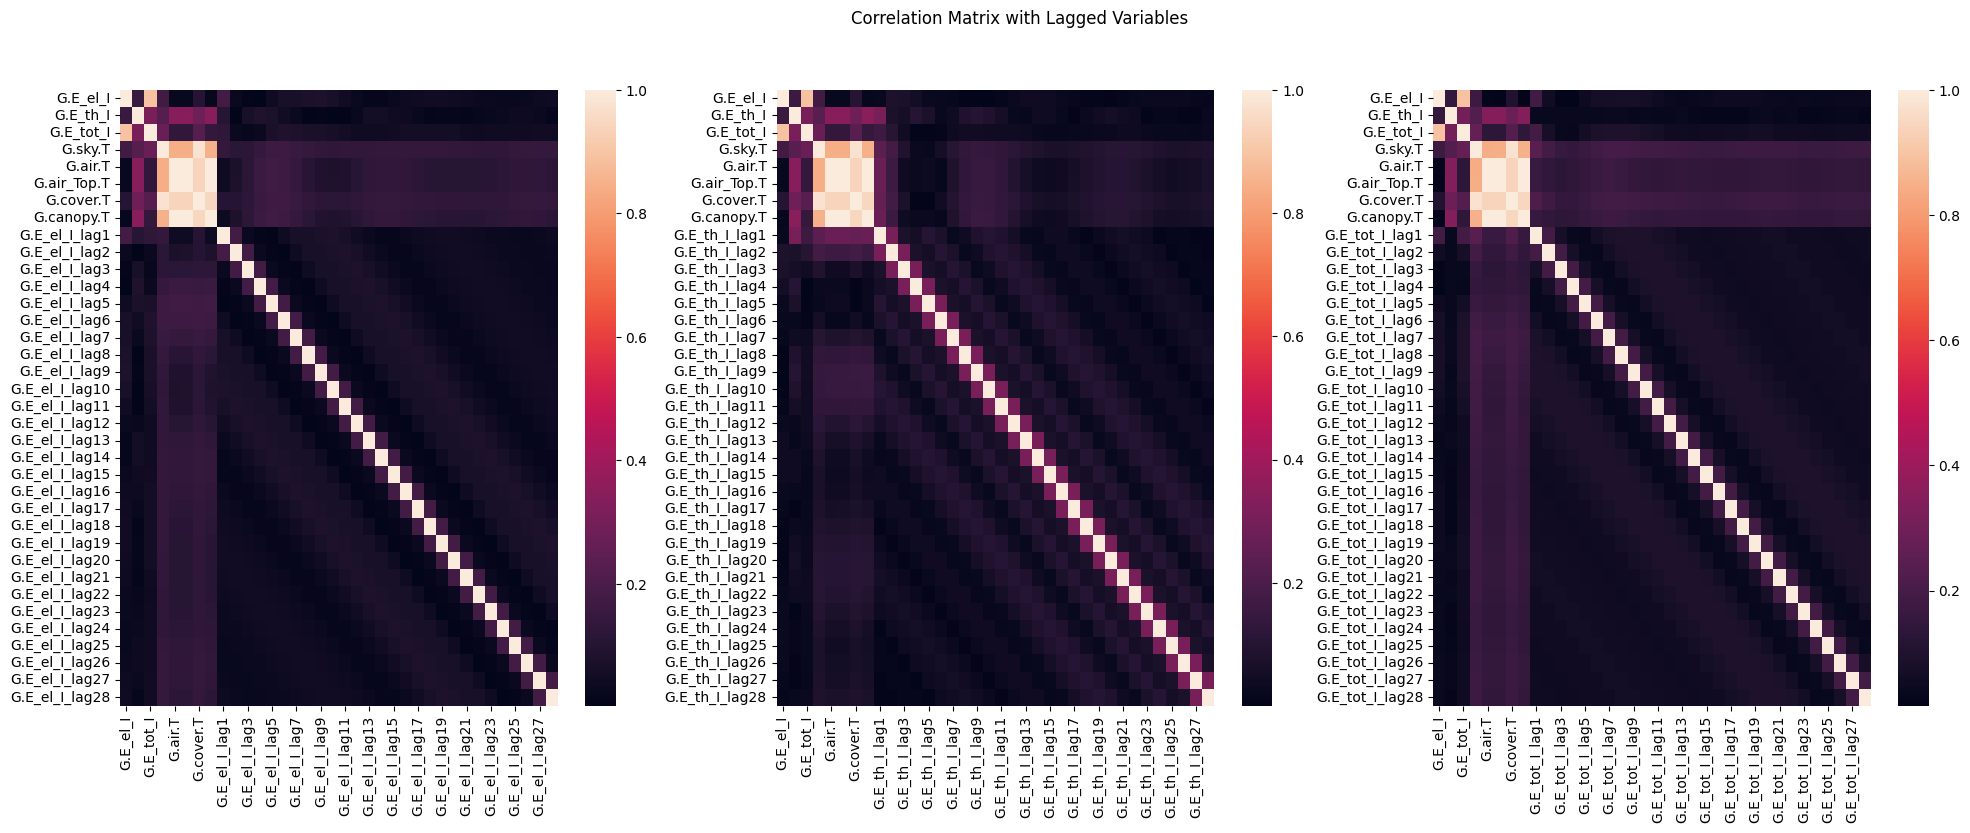

In [99]:
correlation_matrix_lag_el  = abs(data_lag_el.corr())
correlation_matrix_lag_th  = abs(data_lag_th.corr())
correlation_matrix_lag_tot = abs(data_lag_tot.corr())

fig, axes = plt.subplots(1,3, figsize=(24,8))
fig.suptitle('Correlation Matrix with Lagged Variables')

sns.heatmap(correlation_matrix_lag_el,  annot=False, ax=axes[0])
sns.heatmap(correlation_matrix_lag_th,  annot=False, ax=axes[1])
sns.heatmap(correlation_matrix_lag_tot, annot=False, ax=axes[2])
plt.show()

In [65]:
print(data_lag.head())

            G.E_el_I  G.E_th_I  G.E_tot_I   G.sky.T   G.air.T  G.air_Top.T  \
time                                                                         
0.000000         0.0  0.000000   0.000000  0.347328  0.783113     0.782846   
59.471302        0.0  0.227398   0.227398  0.347360  0.608514     0.612307   
60.000000        0.0  0.002104   0.002104  0.347360  0.607512     0.611291   
240.000000       0.0  0.736952   0.736952  0.347455  0.425905     0.427217   
300.000000       0.0  0.247315   0.247315  0.347487  0.404025     0.404718   

            G.cover.T  G.canopy.T  G.E_el_I_lag1  G.E_th_I_lag1  ...  \
time                                                             ...   
0.000000     0.827896    0.879535            NaN            NaN  ...   
59.471302    0.683424    0.837068            0.0       0.000000  ...   
60.000000    0.682387    0.836348            0.0       0.227398  ...   
240.000000   0.468850    0.605287            0.0       0.002104  ...   
300.000000   0.434747

SSA [ref](https://www.kaggle.com/code/leokaka/pca-for-time-series-analysis)


In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2

from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

def plot_2d(m, title=""):
    plt.imshow(m)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

In [ ]:
test_col = df_new['G.air.T']
print(test_col)

In [ ]:
N = len(test_col)
L = 43 # divisor of 95589
K = N - L + 1

#print([test_col[i:i+L] for i in range(0,K)])
X = np.column_stack([test_col[i:i+L] for i in range(0,K)])

In [ ]:
print(df_new)

In [30]:
El_corr = df_std.corr()['G.E_el_I']

In [45]:
print(df_std['G.E_el_I'].corr(df_std['G.cover.T']))

-0.10205350800554606


In [41]:
high_corr = El_corr[abs(El_corr) > 0.2]

high_corr_sorted = high_corr.abs().sort_values(ascending=False).index

print(len(high_corr))

for name in high_corr_sorted:
    print(name, high_corr[name])

116
G.E_el_I 1.0
G.illu.R_IluFlr_PAR 0.6238774304932955
G.illu.R_FlrCan_PAR 0.6238774291664112
G.illu.R_IluFlr_Glob 0.623877427979763
G.illu.R_IluFlr_NIR 0.6238774273731459
G.illu.R_IluCan_PAR 0.6238774271694059
G.illu.R_NIR 0.6238774262387491
W_residual 0.6238774262012186
G.illu.W_el 0.6238774262012186
W_buy 0.6238774262012186
G.illu.R_IluAir_Glob 0.6238774261997718
G.OnOff.y 0.6238774261757325
G.illu.switch 0.6238774261757325
G.illu.R_PAR 0.6238774261464388
G.illu.R_IluCan_Glob 0.6238774261220155
G.illu.R_IluCan_NIR 0.6238774247251565
G.illu.R_PAR_Can_umol 0.6238774246906473
G.illu.R_PAR_Can 0.6238774242375955
G.air.heatPort.Q_flow -0.6189591304943726
G.air.Q_flow -0.6189591304943726
G.air.P_Air 0.6134958499203462
G.out.port.Q_flow 0.48983032045825853
G.SC.SC_usable 0.45248152275748477
G.MV_CanAir.r_I -0.39891780454463327
G.MV_CanAir.C_5 -0.39862312707376485
G.MV_CanAir.C_3 0.39862312669511213
G.MV_CanAir.S_rs 0.39862312669057026
G.MV_CanAir.C_4 0.3986231265576486
G.MV_CanAir.T_m -0.

(96732, 857) (96732, 846)
Mean Squared Error: 0.00839579411352826
R^2 score: -7.4341465216070315


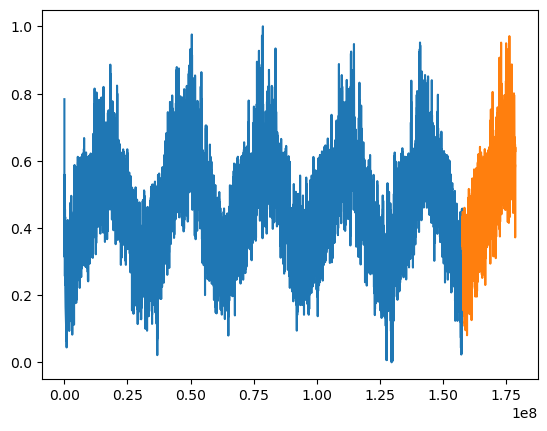

In [176]:
dropped_cols = high_corr.index
X = df_std.drop(dropped_cols, axis=1)
y = df_std['G.E_el_tot']

print(df_std.shape, X.shape)

time_thrsh = 365.25 * 24 * 60 * 60 * 5

train = df_std[df_std.index < time_thrsh]
test = df_std[df_std.index > time_thrsh]

plt.plot(train['G.air.T'])
plt.plot(test['G.air.T'])

model = LinearRegression()
model.fit(train[X.columns], train['G.E_el_tot'])

y_pred = model.predict(test[X.columns])
print(f"Mean Squared Error: {mean_squared_error(test['G.E_el_tot'], y_pred)}")
print(f"R^2 score: {r2_score(test['G.E_el_tot'], y_pred)}")

SVD

In [ ]:
from scipy.linalg import hankel
from numpy.linalg import svd

features = []
for column in df_new.columns:
    data = df_new[column].values
    H = hankel(data[:-1], data[-1:])
    
    U, S, Vt = svd(H, full_matrices=False)
    
    plt.plot(S, 'o-', label=f'Singular Values for {column}')
    plt.legend()
    
    num_comps = min(5, len(S))
    reduced_data = U[:, :num_comps] @ np.diag(S[:num_comps]) @ Vt[:num_comps, :]
    
    features.append(reduced_data)
    
plt.show()